### **Modules**

---



In [49]:
# Data manipulation tools
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Visualization tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

# Encoding tools
from sklearn.preprocessing import LabelEncoder

# Feature scaling tools
from sklearn.preprocessing import RobustScaler

# Data splitting tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning tools
from sklearn.model_selection import GridSearchCV

# Modeling tools
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model evaluation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Miscellaneous
import warnings

### **General Settings**

---



In [46]:
# Display all columns in Pandas DataFrame
pd.set_option('display.max_columns', None)

# Seaborn styles
sns.set_palette('Set2')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Filter warnings
warnings.filterwarnings('ignore')

### **First Look at the Data**

---



In [3]:
# Create a file path
file_path = "/content/drive/MyDrive/Colab Notebooks/BankSatisfaction.csv"

# Read and assign the file
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print("An error occurred:", e)
else:
    memory = df.memory_usage().sum() / 1024 / 1024
    print("File read and assigned successfully.")
    print(f"Memory usage: {round(memory, 2)} MB")

File read and assigned successfully.
Memory usage: 4.48 MB


In [ ]:
# Display random samples
df.sample(n=10).reset_index(drop=True)

,ID,Age,TypeofJob,Marital,EducationLevel,CreditStatus,AmountofMoney,HousingLoan,PersonalLoan,PreviusContactday,PreviusContactDuration,FindProblems,Satisfaction
0,27853,44,blue-collar,married,primary,no,8,no,no,28,531,0,1
1,38508,42,entrepreneur,married,secondary,no,169,yes,no,15,87,0,1
2,27641,43,technician,married,secondary,no,282,no,yes,21,48,0,1
3,32261,24,blue-collar,single,secondary,no,525,yes,no,16,253,1,1
4,24232,37,management,single,tertiary,no,411,yes,yes,17,142,0,1
5,38038,47,blue-collar,married,primary,no,-169,yes,yes,14,172,1,1
6,36123,42,blue-collar,married,secondary,no,4900,yes,no,11,231,2,1
7,12461,43,admin.,single,secondary,no,13,no,yes,1,119,0,1
8,16098,50,blue-collar,married,secondary,no,2013,no,yes,22,226,0,1
9,23940,33,blue-collar,married,secondary,no,842,no,no,29,111,0,1


In [ ]:
# Shape of the data
print(f"Dataset has {df.shape[0]} rows, and {df.shape[1]} columns.")

Dataset has 45211 rows, and 13 columns.


In [ ]:
# Data types
df.info()

# NOTES:
# Target data type is integer even though it is categorical variable by its nature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      45211 non-null  int64 
 1   Age                     45211 non-null  int64 
 2   TypeofJob               45211 non-null  object
 3   Marital                 45211 non-null  object
 4   EducationLevel          45211 non-null  object
 5   CreditStatus            45211 non-null  object
 6   AmountofMoney           45211 non-null  int64 
 7   HousingLoan             45211 non-null  object
 8   PersonalLoan            45211 non-null  object
 9   PreviusContactday       45211 non-null  int64 
 10  PreviusContactDuration  45211 non-null  int64 
 11  FindProblems            45211 non-null  int64 
 12  Satisfaction            45211 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 4.5+ MB


In [ ]:
# Statistics for numerical columns
df.describe().T

# NOTES:
# Further look required for 'AmountofMoney' feature.
# Further look required for 'FindProblems' feature.

,count,mean,std,min,25%,50%,75%,max
ID,45211.0,22605.000000,13051.435847,0.0,11302.5,22605.0,33907.5,45210.0
Age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
AmountofMoney,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
PreviusContactday,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
PreviusContactDuration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
FindProblems,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Satisfaction,45211.0,0.883015,0.321406,0.0,1.0,1.0,1.0,1.0


In [ ]:
# Statistics for categorical columns
df.describe(include='object').T

# NOTES:
# 'TypeofJob' feature has relatively high cardinality.
# 'EducationLevel' feature is ordinal data.

,count,unique,top,freq
TypeofJob,45211,12,blue-collar,9732
Marital,45211,3,married,27214
EducationLevel,45211,4,secondary,23202
CreditStatus,45211,2,no,44396
HousingLoan,45211,2,yes,25130
PersonalLoan,45211,2,no,37967


In [ ]:
# Check unique values

# Choose columns
col_list = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print unique values
for col in col_list:
    uniques = df[col].unique()
    print(f"'{col}' column has {df[col].nunique()} unique values: \n{uniques} \n{'-' * 20}")

# # NOTES:
# 'TypeofJob' column has relatively high cardinality.
# 'TypeofJob' column has an 'unknown' category.
# 'EducationLevel' column has an 'unknown' category.

'TypeofJob' column has 12 unique values: 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 
--------------------
'Marital' column has 3 unique values: 
['married' 'single' 'divorced'] 
--------------------
'EducationLevel' column has 4 unique values: 
['tertiary' 'secondary' 'unknown' 'primary'] 
--------------------
'CreditStatus' column has 2 unique values: 
['no' 'yes'] 
--------------------
'HousingLoan' column has 2 unique values: 
['yes' 'no'] 
--------------------
'PersonalLoan' column has 2 unique values: 
['no' 'yes'] 
--------------------


### **Closer Look with Visualisation**

---



Imbalanced data:
      the minority class represents 11.7% of the total instances, less than 15%!



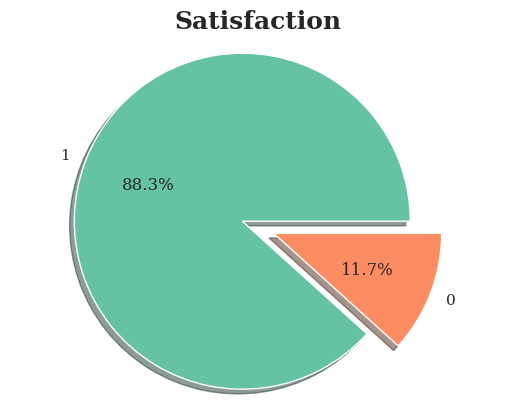

In [ ]:
# Check imbalance

# Assign the target name
target_name = 'Satisfaction'

# Calculate the proportion of the minority class
target_counts = df[target_name].value_counts()
minority_proportion = target_counts.min() / target_counts.sum()

# Define threshold
imbalance_threshold = 0.15

# Check if the minority class represents less than the threshold
if minority_proportion < imbalance_threshold:
    print(f"Imbalanced data:\n\
      the minority class represents {round(minority_proportion*100, 2)}% of the total instances, less than 15%!\n")
else:
    print(f"Not imbalanced data:\n\
      the minority class represents {round(minority_proportion*100, 2)}% of the total instances, more than 15%.\n")

# Create a pie chart
explode = (0, 0.2)
fig, ax = plt.subplots()
ax.pie(target_counts,
       labels=target_counts.index,
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       startangle=0)
ax.axis('equal')

# Set title
ax.set_title("Satisfaction", fontsize=18, weight='bold')
plt.show()

# NOTES:
# Before handling imbalance, we can perform some ensemble learning methods since
# they are usually not heavily impacted by this distribution.
# Later in the process, we can try several methods to handle the imbalance.

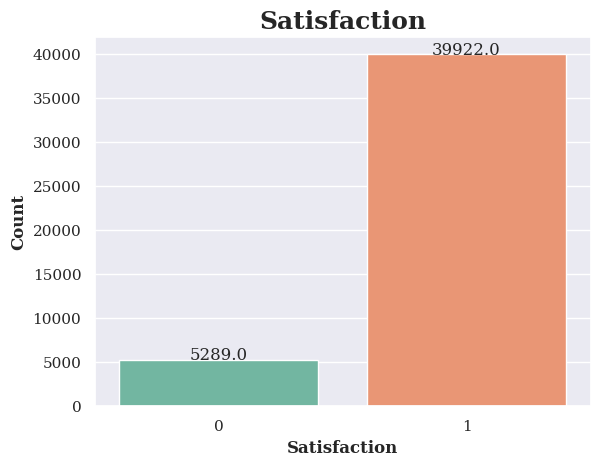

In [ ]:
# Satisfaction value counts

# Create bar plot
fig, ax = plt.subplots()
ax = sns.countplot(x='Satisfaction', data=df)

# set x and y labels and title
ax.set_xlabel("Satisfaction", weight='bold')
ax.set_ylabel("Count", weight='bold')
ax.set_title("Satisfaction", fontsize=18, weight='bold')

# Write the count numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', va='baseline')

plt.show()

# NOTES:
# Satisfied customers are almost 8 times more than the unsatisfied customers.

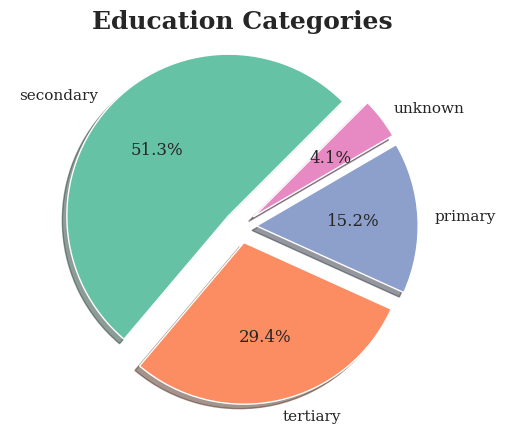

In [ ]:
# Unknown education levels

# Assign the target name
target_name = 'EducationLevel'

# Calculate the proportion of the minority class
target_counts = df[target_name].value_counts()

# Create a pie chart
explode = tuple([0.1] * len(target_counts))
fig, ax = plt.subplots(figsize=(6, 5))
ax.pie(target_counts,
       labels=target_counts.index,
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       startangle=45)
ax.axis('equal')

# Set title
ax.set_title("Education Categories", fontsize=18, weight='bold')
plt.show()

# NOTES:
# Very small percentage of cutomers' education is unknown, hence, some kind of
# imputation will be applied.

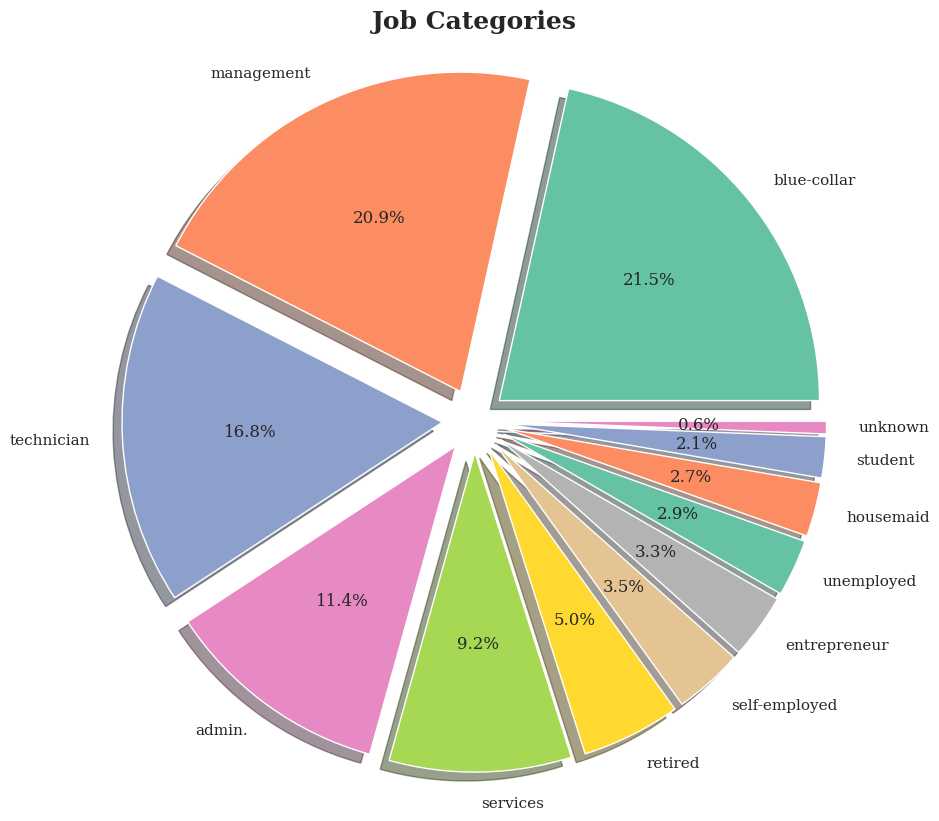

In [ ]:
# Unknown job types

# Assign the target name
target_name = 'TypeofJob'

# Calculate the proportion of the minority class
target_counts = df[target_name].value_counts()

# Create a pie chart
explode = tuple([0.1] * len(target_counts))
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(target_counts,
       labels=target_counts.index,
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       startangle=0)
ax.axis('equal')

# Set title
ax.set_title("Job Categories", fontsize=18, weight='bold')
plt.show()

# NOTES:
# Again, only a small portion of customers' job is unknown, hence, imputation will
# be applied.

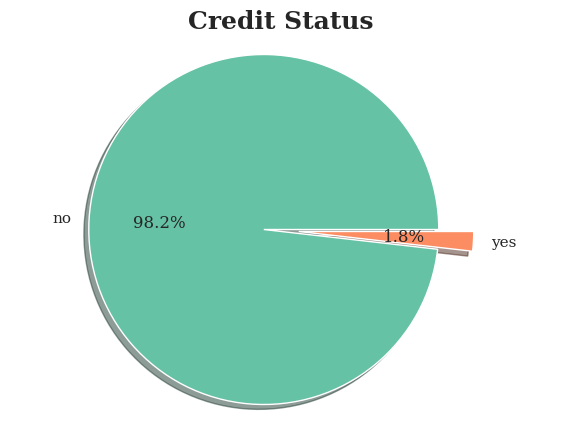

In [ ]:
# Credit status

# Assign the target name
target_name = 'CreditStatus'

# Calculate the proportion of the minority class
target_counts = df[target_name].value_counts()

# Create a pie chart
explode = tuple([0.1] * len(target_counts))
fig, ax = plt.subplots(figsize=(7, 5))
ax.pie(target_counts,
       labels=target_counts.index,
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       startangle=0)
ax.axis('equal')

# Set title
ax.set_title("Credit Status", fontsize=18, weight='bold')
plt.show()

# NOTES:
# Very large percentage of the customers has credit.

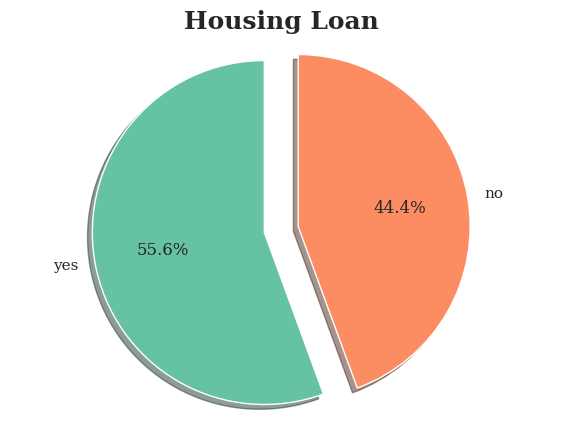

In [ ]:
# Housing loan

# Assign the target name
target_name = 'HousingLoan'

# Calculate the proportion of the minority class
target_counts = df[target_name].value_counts()

# Create a pie chart
explode = tuple([0.1] * len(target_counts))
fig, ax = plt.subplots(figsize=(7, 5))
ax.pie(target_counts,
       labels=target_counts.index,
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       startangle=90)
ax.axis('equal')

# Set title
ax.set_title("Housing Loan", fontsize=18, weight='bold')
plt.show()

# NOTES:
# It seems data is quite balanced regarding the housing loans.

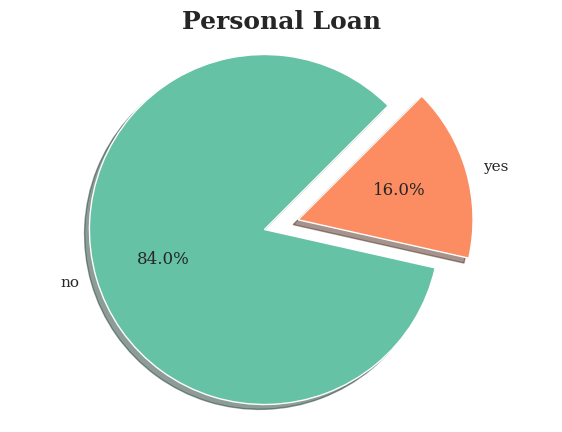

In [ ]:
# Personal loan

# Assign the target name
target_name = 'PersonalLoan'

# Calculate the proportion of the minority class
target_counts = df[target_name].value_counts()

# Create a pie chart
explode = tuple([0.1] * len(target_counts))
fig, ax = plt.subplots(figsize=(7, 5))
ax.pie(target_counts,
       labels=target_counts.index,
       autopct='%1.1f%%',
       explode=explode,
       shadow=True,
       startangle=45)
ax.axis('equal')

# Set title
ax.set_title("Personal Loan", fontsize=18, weight='bold')
plt.show()

# NOTES:
# Customers without a personal loan are approximately 5 times that of the personal loan.

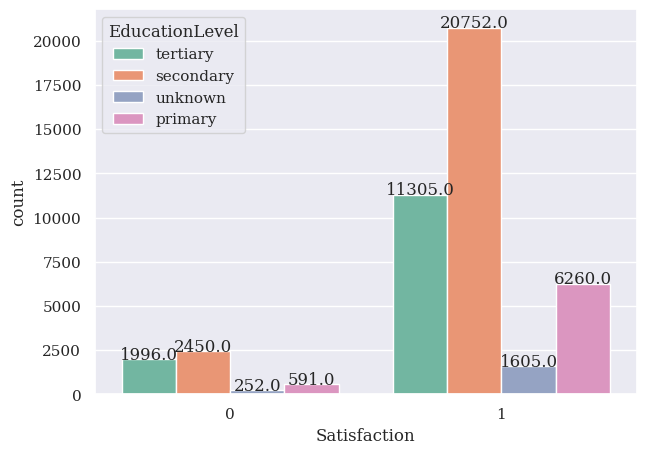

In [ ]:
# Education and Satisfaction

# Plot size
plt.subplots(figsize=(7, 5))

# Countplot
ax = sns.countplot(x=df['Satisfaction'], hue=df['EducationLevel'], palette='Set2', data=df)

# Write the count numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', va='baseline')

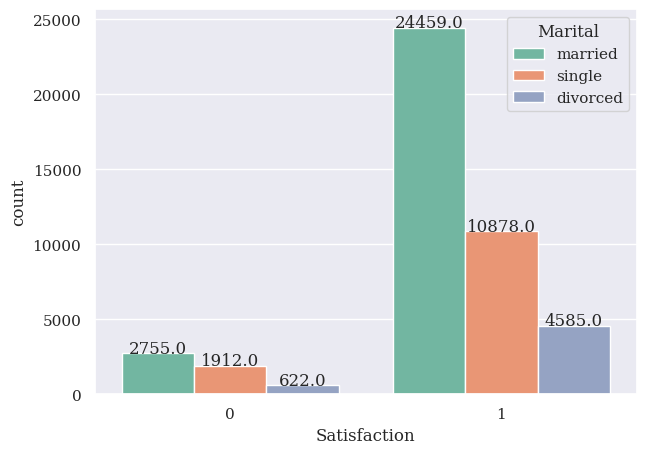

In [ ]:
# Marital and Satisfaction

# Plot size
plt.subplots(figsize=(7, 5))

# Countplot
ax = sns.countplot(x=df['Satisfaction'], hue=df['Marital'], palette='Set2', data=df)

# Write the count numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', va='baseline')

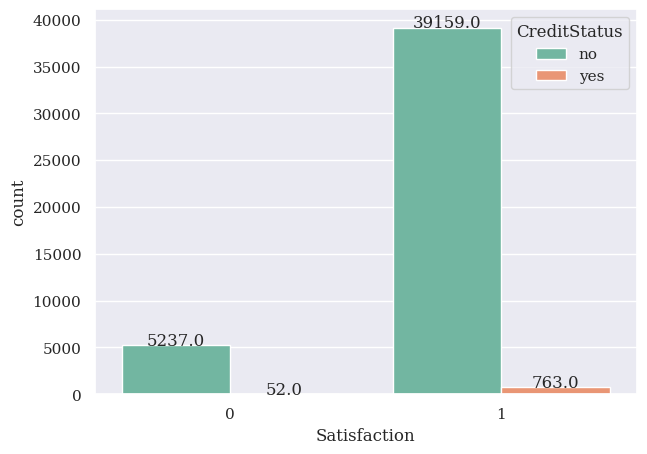

In [ ]:
# Credit Status and Satisfaction

# Plot size
plt.subplots(figsize=(7, 5))

# Countplot
ax = sns.countplot(x=df['Satisfaction'], hue=df['CreditStatus'], palette='Set2', data=df)

# Write the count numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', va='baseline')

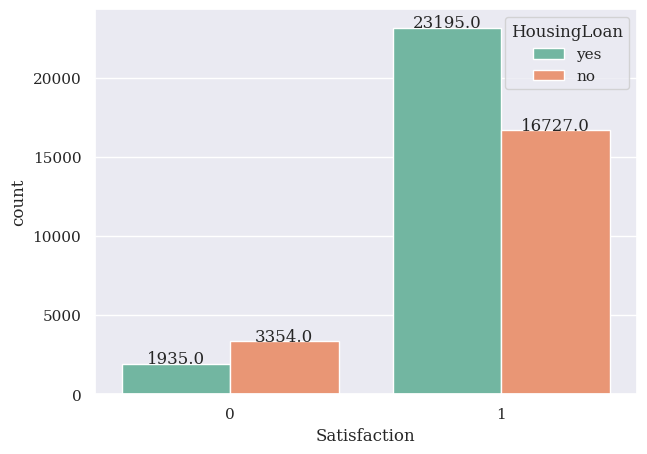

In [ ]:
# Housing Loan and Satisfaction

# Plot size
plt.subplots(figsize=(7, 5))

# Countplot
ax = sns.countplot(x=df['Satisfaction'], hue=df['HousingLoan'], palette='Set2', data=df)

# Write the count numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', va='baseline')
    
# NOTES:
# It seems that customers with no housing loan are more likely to be dissatisfied.
# On the opposing side, satisfied customers are more than dissatisfied customers
# when it comes to customers with housing loan.

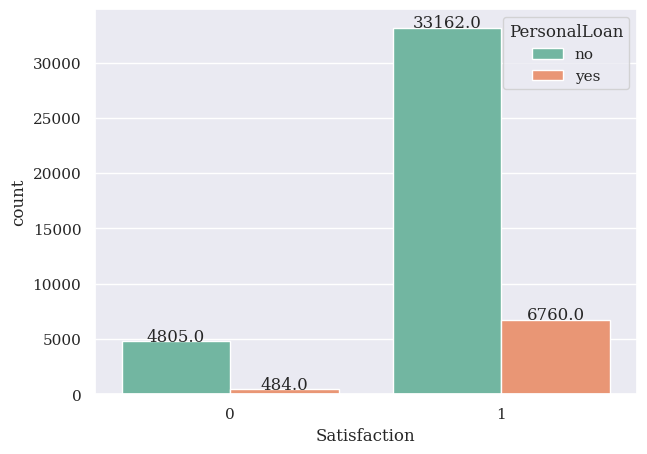

In [ ]:
# Personal Loan and Satisfaction

# Plot size
plt.subplots(figsize=(7, 5))

# Countplot
ax = sns.countplot(x=df['Satisfaction'], hue=df['PersonalLoan'], palette='Set2', data=df)

# Write the count numbers on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', va='baseline')

In [ ]:
# Amount of money

# Counting the number of values below zero
count_below_zero = (df['AmountofMoney'] < 0).sum()

print('Number of values below zero:', count_below_zero)

# NOTES:
# Since no infomation is given regarding the 'AmountofMoney' column, negative
# values will be kept.

Number of values below zero: 3766


<Axes: >

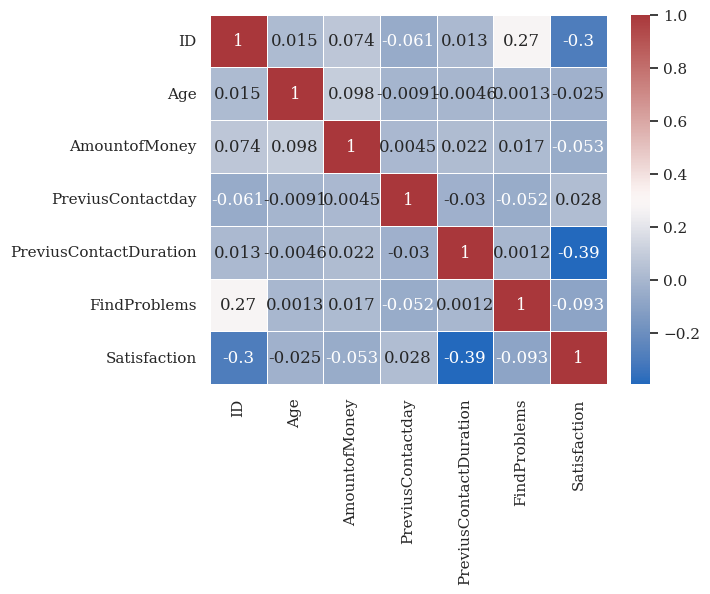

In [ ]:
# Correlation analysis

# Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, cmap='vlag')

# NOTES:
# No strong correlations.

### **Data Cleaning**

---



In [4]:
# Drop unwanted columns

# List of column names to drop
columns_to_drop = ["ID"]

# Drop columns and handle non-existent columns
dropped_columns = []
for column in columns_to_drop:
    try:
        df.drop(column, axis=1, inplace=True)
        dropped_columns.append(column)
    except KeyError:
        print(f"'{column}' is not found.")

# Print the dropped columns
if len(dropped_columns) > 0:
    print(f"Following columns are dropped:\n{dropped_columns}\n{'-' * 20}")
    print(f"Dataset now has {df.shape[0]} rows, and {df.shape[1]} columns.")

# NOTES:
# 'ID' column will not be necessary, hence, dropped.

Following columns are dropped:
['ID']
--------------------
Dataset now has 45211 rows, and 12 columns.


In [ ]:
# Check duplicates

# Count the number of duplicated rows
num_duplicated = df.duplicated().sum()

# Calculate the percentage of duplicated rows
pct_duplicated = num_duplicated / len(df) * 100

# Print the appropriate message
if num_duplicated > 0:
    print(f"There are {num_duplicated} duplicated rows in the dataframe, which is {pct_duplicated:.2f}% of the total.")
else:
    print("There are no duplicated rows in the dataframe.")

There are no duplicated rows in the dataframe.


### **Missing Values and Outliers**

---



In [ ]:
# Missing values for numerical data

if df.isnull().any().any():
    print("There are missing values in the DataFrame")
else:
    print("There are no missing values in the DataFrame")

There are no missing values in the DataFrame


In [5]:
# Missing values for categorical data

# Print missing values in these 2 columns
print("Number of unknown job types: ", (df["TypeofJob"] == 'unknown').sum())
print("Number of unknown education levels: ", (df["EducationLevel"] == 'unknown').sum())
print(f"{'-'*20}")

# Identify columns with 'unknown' values
cols_with_unknowns = ['TypeofJob', 'EducationLevel']

# Loop through the identified columns and replace 'unknown' values with mode
for col in cols_with_unknowns:

    # Calculate mode value
    mode_val = df[col].mode()[0]

    # Replace 'unknown' with mode value
    df[col] = df[col].replace('unknown', mode_val) 

# Check
print("Number of unknowns after replacement:\n",
      f"Job types: {(df['TypeofJob'] == 'unknown').sum()}\n",
      f"Education levels: {(df['EducationLevel'] == 'unknown').sum()}\n",
      f"{'-'*20}")

# NOTES
# We already knew that some of the instances for "TypeofJob" and "EducationLevel"
# columns are entered as 'unknown', hence, they should be considered as missing data.

# These missing values most likely belong to the MNAR (Missing Not At Random)
# category. Since, there seem to be a pattern to why these data are missing. 
# We can see only 'unknown' entries are within only 2 features: "TypeofJob", and
# "EducationLevel" which are also related in real life. 

# Now that we consider these missing values as MNAR, simply deleting them isn't
# wisest choice here.

# One of the method is to treat this as 'missingness' and create a new feature
# for it. However, in our case, it wouldn't work since unknown entries are a very
# small percentage of the data and treating it this way would probably create a
# feature that is not helpful but an additional dimension.

# Therefore, we will replace unknown variables with the mode of that feature.

Number of unknown job types:  288
Number of unknown education levels:  1857
--------------------
Number of unknowns after replacement:
 Job types: 0
 Education levels: 0
 --------------------


In [ ]:
# Outliers

# Define a list of columns to check for outliers
cols_to_check = ['Age', 'AmountofMoney', 'PreviusContactday',
                 'PreviusContactDuration', 'FindProblems']

# Loop through the columns and print the number and percentage of outliers for each column
for col in cols_to_check:
    # Calculate percentiles
    percentiles = np.percentile(df[col], [25, 75])
    
    # Calculate interquartile range (IQR)
    iqr = percentiles[1] - percentiles[0]
    
    # Calculate cutoff for outliers
    cutoff = 1.5 * iqr
    lower_bound = percentiles[0] - cutoff
    upper_bound = percentiles[1] + cutoff
    
    # Calculate the number and percentage of outliers
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    perc_outliers = (num_outliers / len(df)) * 100
    
    # Print the column name, number of outliers, and percentage of outliers
    print(f"'{col}' column has {num_outliers} outliers ({perc_outliers:.2f}%).")
    print(f"{'-'*20}")

# NOTES:
# 'FindProblems' has very large amount of outliers. One way to deal with them
# could be to categorize them.

'Age' column has 487 outliers (1.08%).
--------------------
'AmountofMoney' column has 4729 outliers (10.46%).
--------------------
'PreviusContactday' column has 0 outliers (0.00%).
--------------------
'PreviusContactDuration' column has 3235 outliers (7.16%).
--------------------
'FindProblems' column has 8257 outliers (18.26%).
--------------------


In [6]:
# Handling outliers for 'FindProblems' column

# Number of instances with 0
print(f"There are {df[df['FindProblems'] < 1].shape[0]} instances where 'FindProblems' has a value of 0.")

# Number of instances above 0
print(f"There are {df[df['FindProblems'] >= 1].shape[0]} instances where 'FindProblems' has a value greater than 0.")
print(f"{'-'*20}")

# Replace values larger than 0 with 1
df['FindProblems'] = df['FindProblems'].apply(lambda x: 1 if x > 0 else 0)
print("Unique values for 'FindProblems' after replacement:\n", df['FindProblems'].unique())

# NOTES:
# Only values above zero are the ones that is found to be outliers. Hence, by
# categorizing this column, we can have a column with two categories: those who
# hasn't found any problem and those who has.

There are 36954 instances where 'FindProblems' has a value of 0.
There are 8257 instances where 'FindProblems' has a value greater than 0.
--------------------
Unique values for 'FindProblems' after replacement:
 [0 1]


### **Encoding**

---



In [7]:
# Credit Status, Housing Loan, and Personal Loan

df[['CreditStatus', 'HousingLoan', 'PersonalLoan']] = df[
    ['CreditStatus', 'HousingLoan', 'PersonalLoan']
    ].replace({'yes': 1, 'no': 0})
print("After replacement:\n")

# Check
col_list = ['CreditStatus', 'HousingLoan', 'PersonalLoan']
for col in col_list:
    uniques = df[col].unique()
    print(f"'{col}' column now has {df[col].nunique()} unique values: \n{uniques} \n{'-' * 20}")
df.head()

# NOTES:
# These 3 columns are binary in nature, so we can label 'yes' with 1 and 'no' with 0.

After replacement:

'CreditStatus' column now has 2 unique values: 
[0 1] 
--------------------
'HousingLoan' column now has 2 unique values: 
[1 0] 
--------------------
'PersonalLoan' column now has 2 unique values: 
[0 1] 
--------------------


,Age,TypeofJob,Marital,EducationLevel,CreditStatus,AmountofMoney,HousingLoan,PersonalLoan,PreviusContactday,PreviusContactDuration,FindProblems,Satisfaction
0,58,management,married,tertiary,0,2143,1,0,5,261,0,1
1,44,technician,single,secondary,0,29,1,0,5,151,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,5,76,0,1
3,47,blue-collar,married,secondary,0,1506,1,0,5,92,0,1
4,33,blue-collar,single,secondary,0,1,0,0,5,198,0,1


In [8]:
# Marital

# One-hot encode the 'Marital' column
dummies = pd.get_dummies(df['Marital'])

# Merge new columns
df = pd.concat([df, dummies], axis=1)

# Drop the original 'Marital'
df = df.drop('Marital', axis=1)

print("Marital feature has been one-hot encoded.\n",
      "Original feature has been dropped.\n",
      f"{'-'*20}")

df.head()

# NOTES:
# This column is nominal categorical data and it has only a 3 unique instances:
# married, divorced, and single. Hence, one hot encoding can be applied.

Marital feature has been one-hot encoded.
 Original feature has been dropped.
 --------------------


,Age,TypeofJob,EducationLevel,CreditStatus,AmountofMoney,HousingLoan,PersonalLoan,PreviusContactday,PreviusContactDuration,FindProblems,Satisfaction,divorced,married,single
0,58,management,tertiary,0,2143,1,0,5,261,0,1,0,1,0
1,44,technician,secondary,0,29,1,0,5,151,0,1,0,0,1
2,33,entrepreneur,secondary,0,2,1,1,5,76,0,1,0,1,0
3,47,blue-collar,secondary,0,1506,1,0,5,92,0,1,0,1,0
4,33,blue-collar,secondary,0,1,0,0,5,198,0,1,0,0,1


In [9]:
# Education Level

# create an instance of LabelEncoder
lable_encoder = LabelEncoder()

# define the order of encoding
education_order = ['primary', 'secondary', 'tertiary']

# fit the encoder on the specified order
lable_encoder.fit(education_order)

# transform the 'EducationLevel' column in the DataFrame
df['EducationLevel'] = lable_encoder.transform(df['EducationLevel'])


print(f"Education levels have been label encoded.\n{'-'*20}",
      "\nUnique values for 'EducationLevel':\n", df['EducationLevel'].unique())

# NOTES:
# This feature is ordinal categorical data, hence, we may employ ordinal or label
# encoding.
# Mapping: {'primary': 0, 'secondary': 1, 'tertiary': 2}

Education levels have been label encoded.
-------------------- 
Unique values for 'EducationLevel':
 [2 1 0]


In [10]:
# Job Types

# Create a dictionary for grouping
job_groups = {
    'student': 'others',
    'housemaid': 'others',
    'unemployed': 'others',
    'entrepreneur': 'others',
    'self-employed': 'others'
}

# Group the 'TypeofJob' column using the dictionary
df['TypeofJob'] = df['TypeofJob'].replace(job_groups)
print("Some job types are grouped under the name 'others'.\n",
      f"{'-'*20}\n",
      f" Unique job types after grouping:\n{df['TypeofJob'].unique()}",
      f"\n{'-'*20}")

# Create dummies
dummies = pd.get_dummies(df['TypeofJob'], prefix='TypeofJob')

# Merge dummies to data
df = pd.concat([df, dummies], axis=1)

# Drop the original 'TypeofJob' column
df = df.drop('TypeofJob', axis=1)

print("Job types have been one-hot encoded.\n",
      "Original feature has been dropped.\n",
      f"{'-'*20}")

# Check
df.head()

# NOTES:
# From previous analysis, we know that this feature has 12 unique job types and 
# simply performing one-hot encoding of this feature would result in a dataframe
# of additional 12 columns. Even though we don't have a very high dimensional
# data, we can still look for an more efficient route.

# We can group some of the job types under the same hood. From our analysis, we
# already know that 95% of the samples are comprised of 6 columns. Then, rest
# of the columns canbe grouped under the name of 'others'.

# We can then complete our encoding process with one-hot encoding method.

Some job types are grouped under the name 'others'.
 --------------------
  Unique job types after grouping:
['management' 'technician' 'others' 'blue-collar' 'retired' 'admin.'
 'services'] 
--------------------
Job types have been one-hot encoded.
 Original feature has been dropped.
 --------------------


,Age,EducationLevel,CreditStatus,AmountofMoney,HousingLoan,PersonalLoan,PreviusContactday,PreviusContactDuration,FindProblems,Satisfaction,divorced,married,single,TypeofJob_admin.,TypeofJob_blue-collar,TypeofJob_management,TypeofJob_others,TypeofJob_retired,TypeofJob_services,TypeofJob_technician
0,58,2,0,2143,1,0,5,261,0,1,0,1,0,0,0,1,0,0,0,0
1,44,1,0,29,1,0,5,151,0,1,0,0,1,0,0,0,0,0,0,1
2,33,1,0,2,1,1,5,76,0,1,0,1,0,0,0,0,1,0,0,0
3,47,1,0,1506,1,0,5,92,0,1,0,1,0,0,1,0,0,0,0,0
4,33,1,0,1,0,0,5,198,0,1,0,0,1,0,1,0,0,0,0,0


In [11]:
# Organizing column names

# Rename new columns
df = df.rename(columns={
    'divorced': 'MaritalDivorced',
    'married': 'MaritalMarried',
    'single': 'MaritalSingle',
    'TypeofJob_admin.': 'JobAdmin',
    'TypeofJob_blue-collar': 'JobBlueCollar',
    'TypeofJob_management': 'JobManagement',
    'TypeofJob_others': 'JobOthers',
    'TypeofJob_retired': 'JobRetired',
    'TypeofJob_services': 'JobServices',
    'TypeofJob_technician': 'JobTechnician'
})

# Shape of the data
print(f"Dataset now has {df.shape[0]} rows, and {df.shape[1]} columns.\n", f"{'-'*20}\n")

# Check
df.sample(n=3).reset_index(drop=True)

Dataset now has 45211 rows, and 20 columns.
 --------------------



,Age,EducationLevel,CreditStatus,AmountofMoney,HousingLoan,PersonalLoan,PreviusContactday,PreviusContactDuration,FindProblems,Satisfaction,MaritalDivorced,MaritalMarried,MaritalSingle,JobAdmin,JobBlueCollar,JobManagement,JobOthers,JobRetired,JobServices,JobTechnician
0,54,2,0,2216,1,0,13,167,0,1,0,1,0,0,0,1,0,0,0,0
1,44,1,0,961,0,0,20,314,0,1,0,1,0,1,0,0,0,0,0,0
2,31,2,0,59,1,0,8,314,0,1,0,1,0,0,0,1,0,0,0,0


### **Modeling, Part I - Keeping Imbalance Inplace**

---



In [25]:
# Random Forests

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# NOTE:
# Since we have a significant imbalance in our dataset, we will employ a stratified
# k-fold split so that we can get good representation of both target classes in
# train and test splits.

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(rfc, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
rfc.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = rfc.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.88630065 0.88051816 0.87016037 0.8721226  0.87477824]
Average cross-validation score: 0.88
Standard deviation of cross-validation scores: 0.01
              precision    recall  f1-score   support

           0       0.60      0.34      0.44      1058
           1       0.92      0.97      0.94      7985

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043

AUC-ROC score on test set: 0.66


In [27]:
# K-Neighbors

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(knn, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
knn.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = knn.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.7955451  0.79834382 0.78431312 0.79071333 0.78875568]
Average cross-validation score: 0.79
Standard deviation of cross-validation scores: 0.00
              precision    recall  f1-score   support

           0       0.52      0.30      0.38      1058
           1       0.91      0.96      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.71      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043

AUC-ROC score on test set: 0.63
Confusion Matrix:
 [[ 322  736]
 [ 302 7683]]


In [29]:
# XGBoost

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the XGBoost classifier
xgb = XGBClassifier(max_depth=5, n_estimators=100, random_state=42)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(xgb, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
xgb.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = xgb.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred), f"\n{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.88921965 0.89645821 0.88687599 0.88410912 0.88807542]
Average cross-validation score: 0.89
Standard deviation of cross-validation scores: 0.00
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.36      0.44      1058
           1       0.92      0.97      0.94      7985

    accuracy                           0.90      9043
   macro avg       0.75      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043
 
--------------------
AUC-ROC score on test set: 0.66
--------------------
Confusion Matrix:
 [[ 378  680]
 [ 263 7722]]


In [30]:
# Logistic Regression

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the Logistic Regression classifier
lr = LogisticRegression(random_state=42)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(lr, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
lr.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = lr.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred), f"\n{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.86838113 0.87412902 0.86223733 0.86736874 0.86999598]
Average cross-validation score: 0.87
Standard deviation of cross-validation scores: 0.00
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.21      0.31      1058
           1       0.90      0.98      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.76      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043
 
--------------------
AUC-ROC score on test set: 0.60
--------------------
Confusion Matrix:
 [[ 223  835]
 [ 140 7845]]


In [31]:
# Support Vector Machines

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the SVM classifier
svm = SVC(random_state=42)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(svm, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
svm.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = svm.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred), f"\n{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.80533887 0.80436261 0.78919714 0.81494806 0.78918189]
Average cross-validation score: 0.80
Standard deviation of cross-validation scores: 0.01
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.16      0.26      1058
           1       0.90      0.99      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.75      0.57      0.60      9043
weighted avg       0.86      0.89      0.86      9043
 
--------------------
AUC-ROC score on test set: 0.57
--------------------
Confusion Matrix:
 [[ 172  886]
 [ 112 7873]]


In [32]:
# AdaBoost

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(ada, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
ada.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = ada.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred), f"\n{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Cross-validation scores: [0.88551756 0.88757927 0.8762534  0.87875897 0.88336191]
Average cross-validation score: 0.88
Standard deviation of cross-validation scores: 0.00
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.29      0.38      1058
           1       0.91      0.97      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.74      0.63      0.66      9043
weighted avg       0.87      0.89      0.88      9043
 
--------------------
AUC-ROC score on test set: 0.63
--------------------
Confusion Matrix:
 [[ 305  753]
 [ 225 7760]]


In [ ]:
# NOTES:
# After executing some of the machine learning models, we can see that they are
# not very successful when it comes to predicting the minority class label.

# We can see it on classification reports (low recall and f-1 scores) and
# confusion matrices (high number of FP, TN values)

# For the last chance, we will do some grid search for the relatively successful
# models, namely, Random Forests, AdaBoost, and XGBoost.

In [37]:
# Random Forest Grid Search

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Create a random forest classifier object
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object and fit it to the data
grid_rf = GridSearchCV(rf, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_rf.fit(x_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_rf.best_params_)
print("Best cross-validation score (f1): {:.3f}".format(grid_rf.best_score_))
print(f"{'-'*20}")

# Predict on the test set using the best model
y_pred = grid_rf.predict(x_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# NOTE:
# The model still suffers heavily from the imbalance.

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score (f1): 0.888
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.19      0.29      1058
           1       0.90      0.99      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.61      9043
weighted avg       0.87      0.89      0.86      9043

--------------------


In [38]:
# AdaBoost Grid Search

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1.0]}

# Create an AdaBoost classifier object
ada = AdaBoostClassifier(random_state=42)

# Create a GridSearchCV object and fit it to the data
grid_rf = GridSearchCV(ada, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_rf.fit(x_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_rf.best_params_)
print("Best cross-validation score (f1): {:.3f}".format(grid_rf.best_score_))
print(f"{'-'*20}")

# Predict on the test set using the best model
y_pred = grid_rf.predict(x_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# NOTE:
# If we compare the result of hyperparameter optimization results with the previous
# AdaBoost model, we can see model still suffers heavily from the imbalance.

Best hyperparameters:  {'learning_rate': 1.0, 'n_estimators': 200}
Best cross-validation score (f1): 0.884
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.29      0.39      1058
           1       0.91      0.97      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.75      0.63      0.66      9043
weighted avg       0.87      0.89      0.88      9043

--------------------
AUC-ROC score on test set: 0.63
--------------------
Confusion Matrix:
 [[ 304  754]
 [ 214 7771]]


In [39]:
# XGBoost Grid Search

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0]}

# Create an XGBoost classifier object
xgb = XGBClassifier(random_state=42)

# Create a GridSearchCV object and fit it to the data
grid_rf = GridSearchCV(xgb, param_grid=param_grid, cv=skf, scoring='roc_auc')
grid_rf.fit(x_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_rf.best_params_)
print("Best cross-validation score (f1): {:.3f}".format(grid_rf.best_score_))
print(f"{'-'*20}")

# Predict on the test set using the best model
y_pred = grid_rf.predict(x_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# NOTE:
# Improvement with Grid Search method is minimal.

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best cross-validation score (f1): 0.892
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.33      0.43      1058
           1       0.92      0.97      0.94      7985

    accuracy                           0.90      9043
   macro avg       0.76      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

--------------------
AUC-ROC score on test set: 0.65
--------------------
Confusion Matrix:
 [[ 354  704]
 [ 225 7760]]


In [ ]:
# NOTES:
# We can see even after hyperparameter tuning, results are underwhelming.

# In the next section, we will try to fix imbalance first, then apply machine 
# learning models.

### **Modeling, Part II - Fixing Imbalance**

---



In [47]:
# Method I - Balanced Random Forest

# The Balanced Random Forest uses a modified version of the random forest
# algorithm that balances the training data by under-sampling the majority
# class and over-sampling the minority class.

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the balanced random forest classifier
brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=42)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(brfc, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
brfc.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = brfc.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# NOTES:
# We  can see some improvement for AUC ROC scores, as well as a better prediction
# ability especially when it comes to avoiding False Positives.
# So we are less likely to predict a dissatisfied customer as satisfied.

# However, there is a significant decrease in the precision of our model, hence,
# as we can see from False Negatives, we are more likely to predict a satisfied
# customer as dissatisfied customer.

# Overall, this shift from FP to FN is much less hurting from a business perspective
# as well.

Cross-validation scores: [0.88612736 0.89139877 0.88063804 0.88458743 0.88876036]
Average cross-validation score: 0.89
Standard deviation of cross-validation scores: 0.00
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.85      0.49      1058
           1       0.98      0.79      0.87      7985

    accuracy                           0.79      9043
   macro avg       0.66      0.82      0.68      9043
weighted avg       0.90      0.79      0.83      9043

AUC-ROC score on test set: 0.82
--------------------
Confusion Matrix:
 [[ 899  159]
 [1711 6274]]


In [45]:
# Method II - Over Sampling with SMOTE

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the SMOTE sampling strategy
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the training data only
x_train, y_train = smote.fit_resample(x_train, y_train)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(ada, x_train, y_train, cv=skf,
                            scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
ada.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = ada.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred), f"\n{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# NOTES:
# This method is more balanced than the Balanced Random Forest method when it
# comes to FN and FP predictions.

# It has slightly higher precision with a lesser recall percentage.

Cross-validation scores: [0.88660312 0.92342239 0.92111572 0.9262143  0.92128849]
Average cross-validation score: 0.92
Standard deviation of cross-validation scores: 0.01
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.76      0.50      1058
           1       0.96      0.83      0.89      7985

    accuracy                           0.82      9043
   macro avg       0.67      0.80      0.69      9043
weighted avg       0.89      0.82      0.84      9043
 
--------------------
AUC-ROC score on test set: 0.80
--------------------
Confusion Matrix:
 [[ 808  250]
 [1381 6604]]


In [48]:
# Method III - Ensemble Voting Classifier

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Initialize the individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
lr = LogisticRegression(random_state=42)

# Initialize the voting classifier
vc = VotingClassifier(estimators=[('rf', rf),
                                  ('svm', svm),
                                  ('lr', lr)],
                       voting='soft')

# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(vc, x_train, y_train, cv=skf, scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
vc.fit(x_train, y_train)

# Predict the target variable of the test set
y_pred = vc.predict(x_test)
                     
# Evaluate the performance of the classifier on the test set using classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred), f"\n{'-'*20}")

# Evaluate the performance of the classifier on the test set using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# NOTES:
# Voting classifier is quite similar to previous methods which is expected
# since we didn't specifically fixed the imbalance, rather tried to circumvent
# it by employing an "imbalance-resistant learner".

# However, this shows us that ensemble methods is not bullet-proof against an
# imblaanced dataset.

Cross-validation scores: [0.88374072 0.88822719 0.8782764  0.88010368 0.88612544]
Average cross-validation score: 0.88
Standard deviation of cross-validation scores: 0.00
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.20      0.30      1058
           1       0.90      0.98      0.94      7985

    accuracy                           0.89      9043
   macro avg       0.77      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043
 
--------------------
AUC-ROC score on test set: 0.59
--------------------
Confusion Matrix:
 [[ 207  851]
 [ 122 7863]]


In [51]:
# Method IV - Mixing Stacking and SMOTE

# Split the dataset into training and test sets with stratification
x_train, x_test, y_train, y_test = train_test_split(df.drop('Satisfaction', axis=1), 
                                                    df['Satisfaction'], 
                                                    test_size=0.2, 
                                                    stratify=df['Satisfaction'], 
                                                    random_state=42)

# Scale the features using RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the SMOTE sampling strategy
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the training data only
x_train, y_train = smote.fit_resample(x_train, y_train)

# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5)

# Define the base models and the meta-model
base_models = [('rf', RandomForestClassifier(random_state=42)),
               ('knn', KNeighborsClassifier()),
               ('xgb', XGBClassifier(random_state=42)),
               ('svc', SVC(probability=True, random_state=42))]

meta_model = LogisticRegression()

# Train the base models
print("Base Model Accuracies:")
for name, model in base_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'{name} accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f"{'-'*20}")

# Train the meta-model
stacking_model = StackingClassifier(estimators=base_models,
                                    final_estimator=meta_model,
                                    cv=skf)
# Use cross-validation to evaluate the performance of the classifier
cv_scores = cross_val_score(stacking_model, x_train, y_train, cv=skf, scoring='roc_auc')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores: {}".format(cv_scores))
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(cv_scores.std()))
print(f"{'-'*20}")

# Fit the classifier to the entire training set
stacking_model.fit(x_train, y_train)

# Evaluate the performance
y_pred = stacking_model.predict(x_test)

# Evaluate the performance with classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred), f"\n{'-'*20}")

# Evaluate the performance using AUC-ROC
print("AUC-ROC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred)))
print(f"{'-'*20}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

rf accuracy: 0.8723
knn accuracy: 0.7981
xgb accuracy: 0.8915
svc accuracy: 0.7937
Cross-validation scores: [0.92521967 0.94583133 0.94235449 0.94513202 0.94339113]
Average cross-validation score: 0.94
Standard deviation of cross-validation scores: 0.01
--------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.43      0.45      1058
           1       0.93      0.94      0.93      7985

    accuracy                           0.88      9043
   macro avg       0.70      0.69      0.69      9043
weighted avg       0.87      0.88      0.88      9043
 
--------------------
AUC-ROC score on test set: 0.69
--------------------
Confusion Matrix:
 [[ 460  598]
 [ 507 7478]]


In [ ]:
# ENDING NOTES:

# Our initial model scores for AUC ROC were around 60% when we didn't handle the
# imbalance.

# However, by applying a more cost sensitive learner (Balanced Random Forest)
# we obtained much better results around 80%, almost 20% increase.

# We delivered very similar results with an over-sampling technique (SMOTE) as well.

# Afterwards, we employed a voting method which didn't result the way we wanted.

# Finally, we combined SMOTE with a Stacking learning model. Results were somewhere
# inbetween.